## I am using Hotel review information that is located here: https://www.kaggle.com/datafiniti/hotel-reviews

### I am going to examine the reviews from this dataset and using NLP will link certain words to certain review scores.  The idea would be to identify the common language that appears in the positive reviews compared to common language in the negative reviews.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import string
import spacy
import re
import seaborn as sns
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
hotels_df = pd.read_csv('Datafiniti_Hotel_Reviews_Jun19.csv', index_col=False)
hotels_df.head()

id             dateAdded           dateUpdated  \
0  AWE2FvX5RxPSIh2RscTK  2018-01-18T18:43:12Z  2019-05-20T23:55:47Z   
1  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
2  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
3  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   
4  AVwcj_OhkufWRAb5wi9T  2016-11-06T20:21:05Z  2019-05-20T23:31:56Z   

                          address  \
0                 5620 Calle Real   
1  5th And San Carlos PO Box 3574   
2  5th And San Carlos PO Box 3574   
3  5th And San Carlos PO Box 3574   
4  5th And San Carlos PO Box 3574   

                                          categories  \
0  Hotels,Hotels and motels,Hotel and motel mgmt....   
1                               Hotels,Lodging,Hotel   
2                               Hotels,Lodging,Hotel   
3                               Hotels,Lodging,Hotel   
4                               Hotels,Lodging,Hotel   

               primaryCategories               city country  \
0  Accommodation & Food Services             Goleta      US   
1  Accommodation & Food Services  Carmel by the Sea      US   
2  Accommodation & Food Services  Carmel by the Sea      US   
3  Accommodation & Food Services  Carmel by the Sea      US   
4  Accommodation & Food Services  Carmel by the Sea      US   

                                                keys  latitude  ...  \
0             us/ca/goleta/5620callereal/-1127060008  34.44178  ...   
1  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722  ...   
2  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722  ...   
3  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722  ...   
4  us/ca/carmelbythesea/5thandsancarlospobox3574/...  36.55722  ...   

                            reviews.dateSeen reviews.rating  \
0                       2018-01-03T00:00:00Z              3   
1                       2016-10-09T00:00:00Z              4   
2                       2016-10-09T00:00:00Z              3   
3                       2016-10-31T00:00:00Z              5   
4  2016-10-09T00:00:00Z,2016-03-27T00:00:00Z              2   

                                  reviews.sourceURLs  \
0  https://www.tripadvisor.com/Hotel_Review-g3243...   
1  https://www.tripadvisor.com/Hotel_Review-g3217...   
2  https://www.tripadvisor.com/Hotel_Review-g3217...   
3  https://www.tripadvisor.com/Hotel_Review-g3217...   
4  https://www.tripadvisor.com/Hotel_Review-g3217...   

                                        reviews.text  \
0  This hotel was nice and quiet. Did not know, t...   
1  We stayed in the king suite with the separatio...   
2  Parking was horrible, somebody ran into my ren...   
3  Not cheap but excellent location. Price is som...   
4  If you get the room that they advertised on th...   

                                       reviews.title  reviews.userCity  \
0                            Best Western Plus Hotel          San Jose   
1  Clean rooms at solid rates in the heart of Carmel     San Francisco   
2                                           Business   Prescott Valley   
3                                          Very good          Guaynabo   
4                       Low chance to come back here              Reno   

  reviews.userProvince  reviews.username  \
0         UnitedStates      tatsurok2018   
1                   CA         STEPHEN N   
2                   AZ         15Deborah   
3                   PR        Wilfredo M   
4                   NV             Luc D   

                                          sourceURLs  \
0  https://www.tripadvisor.com/Hotel_Review-g3243...   
1  http://www.tripadvisor.com/Hotel_Review-g32172...   
2  http://www.tripadvisor.com/Hotel_Review-g32172...   
3  http://www.tripadvisor.com/Hotel_Review-g32172...   
4  http://www.tripadvisor.com/Hotel_Review-g32172...   

                                            websites  
0  https://www.bestwestern.com/en_US/book/hotel-r...  
1                 

In [3]:
hotels_df_full = hotels_df

In [4]:
hotels_df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

In [5]:
hotels_df.shape

(10000, 26)

In [6]:
hotels_df.isnull().sum()

id                          0
dateAdded                   0
dateUpdated                 0
address                     0
categories                  0
primaryCategories           0
city                        0
country                     0
keys                        0
latitude                    0
longitude                   0
name                        0
postalCode                  0
province                    0
reviews.date                0
reviews.dateAdded       10000
reviews.dateSeen            0
reviews.rating              0
reviews.sourceURLs          0
reviews.text                0
reviews.title               1
reviews.userCity            0
reviews.userProvince        2
reviews.username            0
sourceURLs                  0
websites                    0
dtype: int64

### Locations

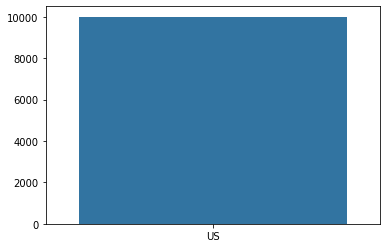

In [7]:
country = hotels_df['country'].value_counts()
sns.barplot(country.index, country.values)

All the hotels in this data are in the United States.

In [8]:
hotels_df['city'].nunique()

842

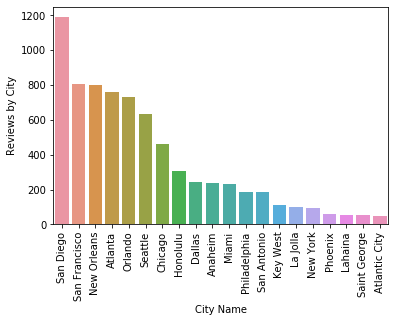

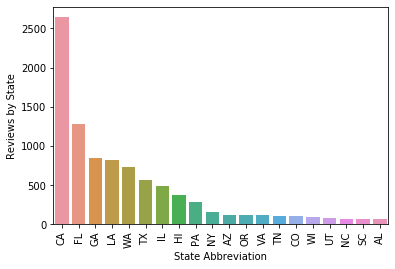

In [9]:
city_counts = hotels_df['city'].value_counts()[:20]
sns.barplot(city_counts.index, city_counts.values)
plt.ylabel('Reviews by City')
plt.xlabel('City Name')
plt.xticks(rotation='vertical')
plt.show()

state_counts = hotels_df['province'].value_counts()[:20]
sns.barplot(state_counts.index, state_counts.values)
plt.ylabel('Reviews by State')
plt.xlabel('State Abbreviation')
plt.xticks(rotation='vertical')
plt.show()

### Hotels

In [10]:
hotels_df['name'].value_counts()

Hyatt House Seattle/Downtown                          209
Hotel Emma                                            183
French Market Inn                                     144
St. James Hotel, an Ascend Hotel Collection Member    136
Grand Hyatt Seattle                                   135
                                                     ... 
Courtyard Orlando Lake Mary North                       1
Iron Ridge Inn Motel                                    1
Hotel 7 Vienna                                          1
Motel 6 Willows                                         1
Red Lion Inn Suites                                     1
Name: name, Length: 1311, dtype: int64

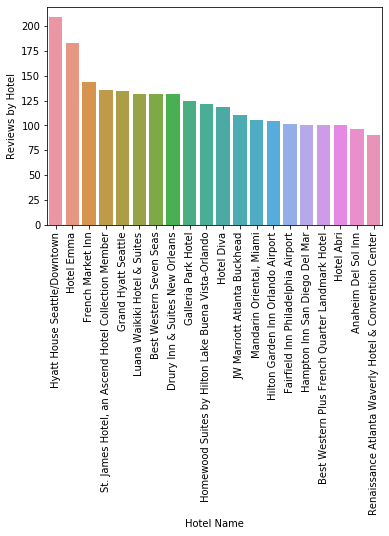

In [11]:
hotel_counts = hotels_df['name'].value_counts()[:20]
sns.barplot(hotel_counts.index, hotel_counts.values)
plt.ylabel('Reviews by Hotel')
plt.xlabel('Hotel Name')
plt.xticks(rotation='vertical')
plt.show()

There are 1311 different hotels in this database and they are from a wide range of locations within the United States.  This validates the data because it isn't condensed into a small number of states/hotels.

## Target Variable
Since the goal of my project is to identify the common language in reviews I only need to work with the reviews.rating and the reviews.text columns of this dataset.  There are no missing values in either of those columns.

In [12]:
hotels_df = hotels_df[['reviews.rating', 'reviews.text']]
hotels_df.head()

reviews.rating                                       reviews.text
0               3  This hotel was nice and quiet. Did not know, t...
1               4  We stayed in the king suite with the separatio...
2               3  Parking was horrible, somebody ran into my ren...
3               5  Not cheap but excellent location. Price is som...
4               2  If you get the room that they advertised on th...

# Data Cleaning, Data Exploration, and Feature Engineering

I need to identify what would be considered a "positive" review and what would be "negative."

In [13]:
hotels_df.nunique()

reviews.rating       5
reviews.text      9770
dtype: int64

In [14]:
hotels_df['reviews.rating'].value_counts()

5    4840
4    2849
3    1190
1     567
2     554
Name: reviews.rating, dtype: int64

Text(0.5, 1.0, 'Number of review scores by rating')

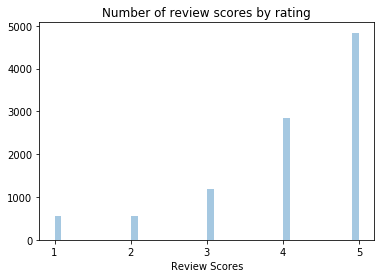

In [15]:
sns.distplot(hotels_df['reviews.rating'], kde=False)
plt.xticks([1,2,3,4,5])
plt.xlabel('Review Scores')
plt.title('Number of review scores by rating')

This shows me that there are 5 different ratings for a hotel.  Based on the rating system, the number of different values I'm working with, and the review text that I have sampled I am going to classify the values of 1,2, and 3 as the "negative" classification and 4 and 5 as the "positive."  I'm going to create a new column to illustrate this. 

In [16]:
ranking = []
for rating in hotels_df['reviews.rating']:
    if rating == 1 or rating == 2 or rating == 3:
        ranking.append('Negative')
    else:
        ranking.append('Positive')


In [17]:
print(ranking[:5])

['Negative', 'Positive', 'Negative', 'Positive', 'Negative']


In [18]:
hotels_df['ranking'] = ranking

In [19]:
hotels_df.drop(['reviews.rating'], axis=1, inplace=True)

In [20]:
hotels_df.head()

reviews.text   ranking
0  This hotel was nice and quiet. Did not know, t...  Negative
1  We stayed in the king suite with the separatio...  Positive
2  Parking was horrible, somebody ran into my ren...  Negative
3  Not cheap but excellent location. Price is som...  Positive
4  If you get the room that they advertised on th...  Negative

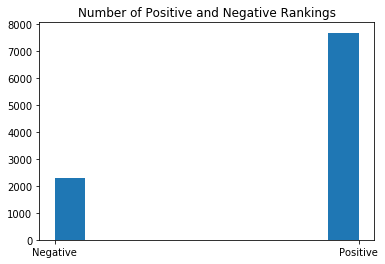

In [21]:
plt.hist(hotels_df['ranking'])
plt.title('Number of Positive and Negative Rankings')
plt.show()

In [22]:
# I am renaming the columns here because I don't like that they have a .
# inbetween the words
hotels_df.rename(columns={'reviews.text': 'text'}, inplace=True)

In [23]:
hotels_df.columns

Index(['text', 'ranking'], dtype='object')

Now I have a binary system that I can use to identify whether a guest had a positive or negative experience at the hotel they stayed at.  It is very clear that I have a large discrepency between the positive and negative reviews.  I have my dataframe down to the columns that I need and now I am going to start cleaning and tokenizing the text within each review.

# Text Preprocessing

In [24]:
def text_cleaner(text):
    text = text.lower()
    text = text.split()
    text = ' '.join(text)
    return text
#hotels_df['text'] = hotels_df['text'].apply(lambda x: text_cleaner(x))

## Doing this step is what caused the other functions to break.  Is there
# Something different that I should use to do this?

In [25]:
hotels_df.head()

text   ranking
0  This hotel was nice and quiet. Did not know, t...  Negative
1  We stayed in the king suite with the separatio...  Positive
2  Parking was horrible, somebody ran into my ren...  Negative
3  Not cheap but excellent location. Price is som...  Positive
4  If you get the room that they advertised on th...  Negative

In [26]:
nlp = spacy.load('en', disable=['parser', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))
nlp.max_length = 20000000

#hotels_df['text'] = hotels_df['text'].apply(nlp)

In [27]:
hotels_df.head()

text   ranking
0  This hotel was nice and quiet. Did not know, t...  Negative
1  We stayed in the king suite with the separatio...  Positive
2  Parking was horrible, somebody ran into my ren...  Negative
3  Not cheap but excellent location. Price is som...  Positive
4  If you get the room that they advertised on th...  Negative

### Removing Punctuation

In [28]:
# Removing the PUnctuation from my text
def remove_punctuation(text):
    no_punct = ''.join([c for c in text if c not in string.punctuation])
    return no_punct

In [29]:
hotels_df['text'] = hotels_df.apply(lambda x: remove_punctuation(x['text']), axis=1)
hotels_df['text'].head()

0    This hotel was nice and quiet Did not know the...
1    We stayed in the king suite with the separatio...
2    Parking was horrible somebody ran into my rent...
3    Not cheap but excellent location Price is some...
4    If you get the room that they advertised on th...
Name: text, dtype: object

### Tokenizing the Text

In [30]:
tokenizer = RegexpTokenizer(r'\w+')

In [31]:
hotels_df['text'] = hotels_df['text'].apply(lambda x: tokenizer.tokenize(x))
hotels_df['text'].head()

0    [This, hotel, was, nice, and, quiet, Did, not,...
1    [We, stayed, in, the, king, suite, with, the, ...
2    [Parking, was, horrible, somebody, ran, into, ...
3    [Not, cheap, but, excellent, location, Price, ...
4    [If, you, get, the, room, that, they, advertis...
Name: text, dtype: object

In [32]:
length_token = hotels_df['text'].str.len()
length_token

0       39
1       61
2       54
3       52
4       60
        ..
9995    61
9996    45
9997    50
9998    35
9999    38
Name: text, Length: 10000, dtype: int64

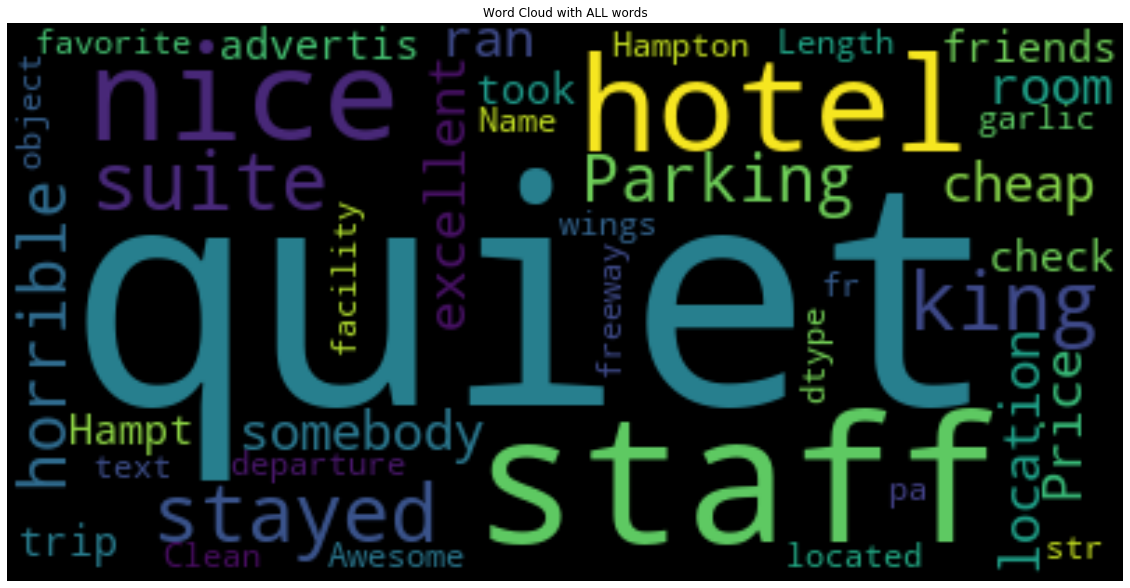

In [33]:
plt.figure(figsize=(20,20))
text = str(hotels_df['text'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud with ALL words')
plt.show()

### Removing the Stopwords

In [34]:
def remove_stopwords(text):
    words = [word for word in text if word not in stopwords.words('english')]
    return words

In [35]:
hotels_df['text'] = hotels_df['text'].apply(lambda x: remove_stopwords(x))
hotels_df['text'].head()

0    [This, hotel, nice, quiet, Did, know, train, t...
1    [We, stayed, king, suite, separation, bedroom,...
2    [Parking, horrible, somebody, ran, rental, car...
3    [Not, cheap, excellent, location, Price, somew...
4    [If, get, room, advertised, website, paid, may...
Name: text, dtype: object

In [36]:
length_stop = hotels_df['text'].str.len()
length_stop

0       21
1       36
2       29
3       32
4       34
        ..
9995    32
9996    23
9997    32
9998    21
9999    24
Name: text, Length: 10000, dtype: int64

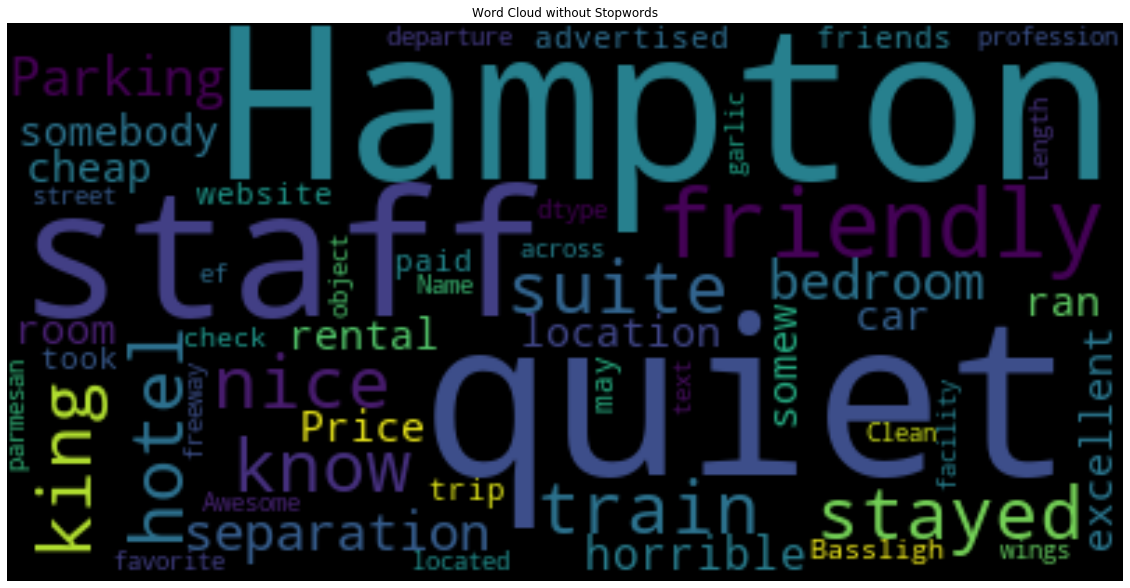

In [37]:
plt.figure(figsize=(20,20))
text = str(hotels_df['text'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud without Stopwords')
plt.show()

## Lemmatization and their Frequencies

In [38]:
# Lemmatization
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lemmas = [lemmatizer.lemmatize(i) for i in text]
    return lemmas

In [39]:
hotels_df['text'].apply(lambda x: word_lemmatizer(x))

0       [This, hotel, nice, quiet, Did, know, train, t...
1       [We, stayed, king, suite, separation, bedroom,...
2       [Parking, horrible, somebody, ran, rental, car...
3       [Not, cheap, excellent, location, Price, somew...
4       [If, get, room, advertised, website, paid, may...
                              ...                        
9995    [My, friend, I, took, trip, Hampton, Basslight...
9996    [check, departure, staff, friendly, profession...
9997    [This, Hampton, located, quiet, street, across...
9998    [Awesome, wing, favorite, garlic, parmesan, gr...
9999    [Clean, facility, freeway, staff, friendly, ef...
Name: text, Length: 10000, dtype: object

In [40]:
hotels_df.head()

text   ranking
0  [This, hotel, nice, quiet, Did, know, train, t...  Negative
1  [We, stayed, king, suite, separation, bedroom,...  Positive
2  [Parking, horrible, somebody, ran, rental, car...  Negative
3  [Not, cheap, excellent, location, Price, somew...  Positive
4  [If, get, room, advertised, website, paid, may...  Negative

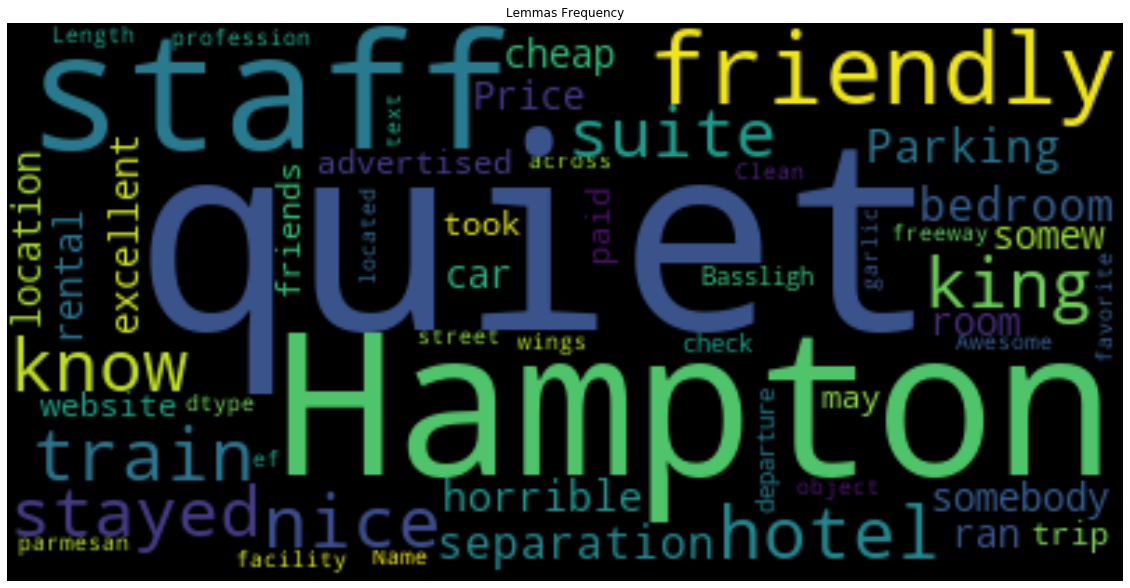

In [41]:
plt.figure(figsize=(20,20))
text = str(hotels_df['text'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Lemmas Frequency')
plt.show()

Since most of my data is positive reviews it makes sense that words like 'great', 'nice', 'good', 'friendly', etc. are the most common.  I am going to split my reviews into the Positive and Negative so that I can get a better idea of the language used that is specific to each sentiment.

## Splitting the Positive and Negative and Examining them separately

### Positive Reviews

In [42]:
hotels_df_pos = hotels_df[(hotels_df['ranking'] == 'Positive')]
hotels_df_pos.head()

text   ranking
1   [We, stayed, king, suite, separation, bedroom,...  Positive
3   [Not, cheap, excellent, location, Price, somew...  Positive
5   [This, fun, lovely, hotel, The, attention, det...  Positive
8                                          [MoreMore]  Positive
10  [This, new, Hampton, Inn, well, decorated, The...  Positive

In [43]:
hotels_df_pos['text']=hotels_df_pos['text'].astype(str)
result = Counter(" ".join(hotels_df_pos['text'].values.tolist()).split(" ")).items() 
def sorting_list(sub_li):
    sub_li.sort(key = lambda x: x[1], reverse=True)
    return sub_li

print(sorting_list(list(result)))



[("'I',", 9091), ("'The',", 8932), ("'hotel',", 7583), ("'We',", 6420), ("'room',", 5908), ("'stay',", 5543), ("'staff',", 4491), ("'great',", 4357), ("'us',", 3836), ("'clean',", 3157), ("'nice',", 2761), ("'time',", 2728), ("'location',", 2674), ("'breakfast',", 2673), ("'good',", 2399), ("'rooms',", 2332), ("'friendly',", 2231), ("'would',", 2078), ("'stayed',", 1925), ("'comfortable',", 1905), ("'service',", 1863), ("'It',", 1835), ("'back',", 1822), ("'area',", 1764), ("'one',", 1747), ("'well',", 1697), ("'enjoyed',", 1644), ("'helpful',", 1568), ("'next',", 1547), ("'review',", 1434), ("'place',", 1405), ("'night',", 1302), ("'experience',", 1295), ("'get',", 1289), ("'like',", 1275), ("'pool',", 1275), ("'also',", 1255), ("'Thank',", 1240), ("'desk',", 1215), ("'hope',", 1208), ("['We',", 1198), ("'much',", 1179), ("'see',", 1167), ("'front',", 1147), ("'hear',", 1091), ("'visit',", 1090), ("'San',", 1071), ("'free',", 1067), ("'really',", 1065), ("'parking',", 1048), ("'Inn',"

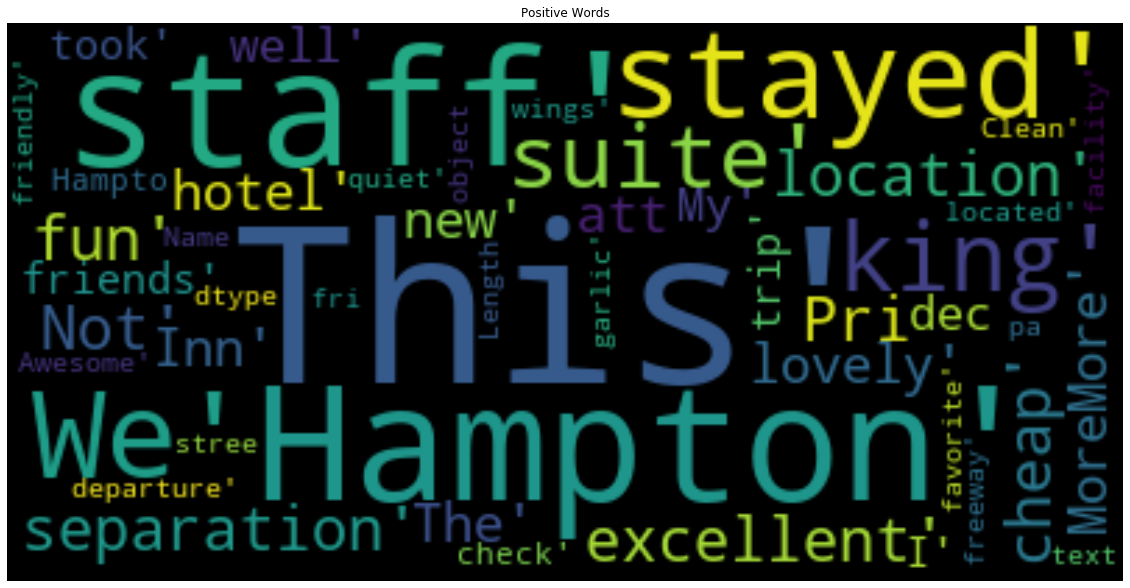

In [44]:
plt.figure(figsize=(20,20))
text = str(hotels_df_pos['text'])

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Words')
plt.show()

In [45]:
def lemma_frequencies(text):
    lemmas = []
    for token in text:
        if not token.is_punct:
            lemmas.append(token.lemma_)
    return Counter(lemmas)

### Negative Reviews

In [46]:
hotels_df_neg = hotels_df[(hotels_df['ranking'] == 'Negative')]
hotels_df_neg.head()

text   ranking
0  [This, hotel, nice, quiet, Did, know, train, t...  Negative
2  [Parking, horrible, somebody, ran, rental, car...  Negative
4  [If, get, room, advertised, website, paid, may...  Negative
6  [We, recently, stayed, hotel, trip, Lexington,...  Negative
7  [I, reserved, room, week, advance, knowing, mo...  Negative

In [47]:
hotels_df_neg['text']=hotels_df_neg['text'].astype(str)
result = Counter(" ".join(hotels_df_neg['text'].values.tolist()).split(" ")).items() 
def sorting_list(sub_li):
    sub_li.sort(key = lambda x: x[1], reverse=True)
    return sub_li

print(sorting_list(list(result)))

[("'I',", 5712), ("'room',", 3434), ("'The',", 2804), ("'hotel',", 2711), ("'We',", 1936), ("'stay',", 1641), ("'us',", 1524), ("'would',", 1226), ("'time',", 945), ("'staff',", 938), ("'one',", 886), ("'rooms',", 881), ("'night',", 808), ("'like',", 796), ("'good',", 762), ("'get',", 750), ("'desk',", 742), ("'clean',", 697), ("'breakfast',", 683), ("'front',", 667), ("'location',", 654), ("'nice',", 646), ("'service',", 623), ("'It',", 608), ("'stayed',", 591), ("'experience',", 588), ("'next',", 562), ("'back',", 554), ("'bed',", 537), ("'great',", 531), ("'place',", 526), ("'didnt',", 519), ("'could',", 519), ("'area',", 497), ("'hope',", 495), ("'guests',", 479), ("'small',", 457), ("'feedback',", 448), ("'day',", 448), ("'More']", 432), ("'floor',", 432), ("'bathroom',", 429), ("'parking',", 420), ("'door',", 416), ("'review',", 401), ("'much',", 400), ("'told',", 388), ("'really',", 388), ("'two',", 387), ("'There',", 387), ("'another',", 383), ("'got',", 380), ("'even',", 377),

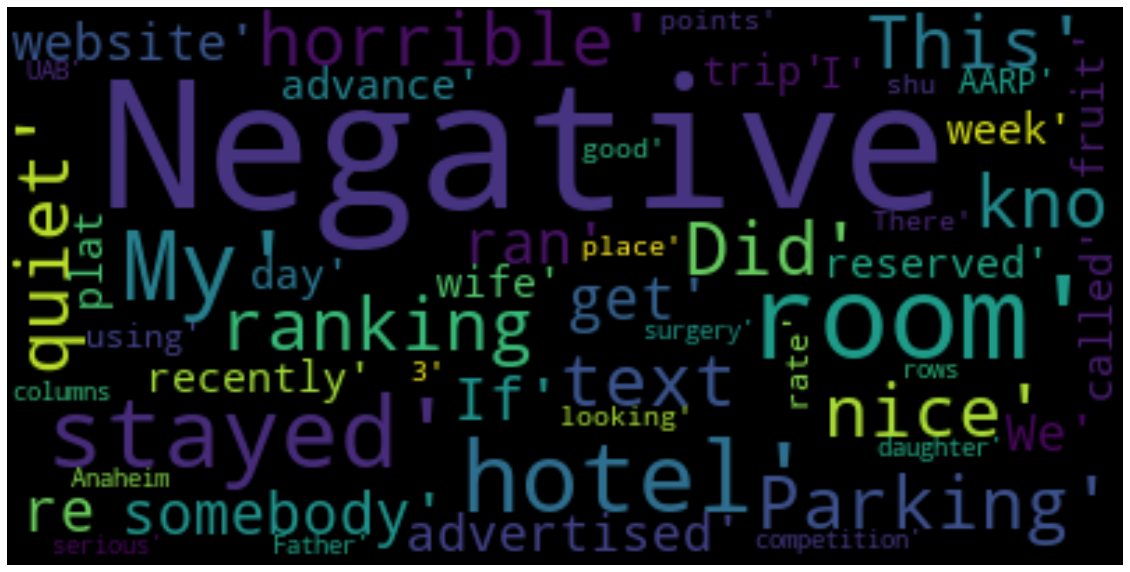

In [48]:
# Now I will do another word cloud for the negative words
plt.figure(figsize=(20,20))
text = str(hotels_df_neg)

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Using Bag of Words for Classification Models

In [49]:
hotels_df['text_string'] = [' '.join(map(str, l)) for l in hotels_df['text']]
hotels_df.head()

text   ranking  \
0  [This, hotel, nice, quiet, Did, know, train, t...  Negative   
1  [We, stayed, king, suite, separation, bedroom,...  Positive   
2  [Parking, horrible, somebody, ran, rental, car...  Negative   
3  [Not, cheap, excellent, location, Price, somew...  Positive   
4  [If, get, room, advertised, website, paid, may...  Negative   

                                         text_string  
0  This hotel nice quiet Did know train track nea...  
1  We stayed king suite separation bedroom living...  
2  Parking horrible somebody ran rental car stayi...  
3  Not cheap excellent location Price somewhat st...  
4  If get room advertised website paid may luckyI...

In [50]:
X = hotels_df['text_string']
y = hotels_df['ranking']

In [51]:
print(X)

0       This hotel nice quiet Did know train track nea...
1       We stayed king suite separation bedroom living...
2       Parking horrible somebody ran rental car stayi...
3       Not cheap excellent location Price somewhat st...
4       If get room advertised website paid may luckyI...
                              ...                        
9995    My friends I took trip Hampton Basslights show...
9996    check departure staff friendly professional wa...
9997    This Hampton located quiet street across hospi...
9998    Awesome wings favorite garlic parmesan great a...
9999    Clean facility freeway staff friendly efficien...
Name: text_string, Length: 10000, dtype: object


In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(lowercase=False)
X = cv.fit_transform(X)
bow_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
#sentences = pd.concat([bow_df, sentences[['text', 'ranking']]], axis=1)


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [54]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.coef_)

[[-0.01552657 -0.03196368  0.         ... -0.13520515  0.
   0.11923696]]


In [55]:
rfc = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=16)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [56]:
gbc = GradientBoostingClassifier(n_estimators=20, max_depth=2, max_leaf_nodes=2)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=2,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [57]:
print("----------------------Logistic Regression Scores----------------------")
print('Training set score:', lr.score(X_train, y_train))
print('Test set score:', lr.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score:', rfc.score(X_train, y_train))
print('Test set score:', rfc.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score:', gbc.score(X_train, y_train))
print('Test set score:', gbc.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score: 0.9945333333333334
Test set score: 0.8836
----------------------Random Forest Scores----------------------
Training set score: 0.7661333333333333
Test set score: 0.7792
----------------------Gradient Boosting Scores----------------------
Training set score: 0.7825333333333333
Test set score: 0.7952


After seeing the scores for Logistic Regression I want to see if I can address the overfitting by running a Cross-Validation model.

In [58]:
lr_cv = LogisticRegressionCV(cv=5, random_state=16).fit(X_train, y_train)
print(lr_cv.score(X_train, y_train))
print(lr_cv.score(X_test, y_test))

0.9808
0.886


There is slightly less overfitting with 5 CV on the Logistic Regression and the model scores slightly better (88.6 compared to 88.3).  

Based on the scores that I received here it is pretty clear that my Logistic Regression and Random Forest Models both had some overfitting.  This is something that seems to be common with Bag of Words so I am going to try using a different method and see how that turns out.

## Using 2-grams Bag of Words

In [59]:
corpus  = []
pstem = PorterStemmer()
for i in range(hotels_df['text'].shape[0]):
    #Remove unwanted words
    rev = re.sub("[^a-zA-Z]", ' ', str(hotels_df['text'][i]))
    #Transform words to lowercase
    rev = rev.lower()
    rev = rev.split()
    #Remove stopwords then Stemming it
    rev = [pstem.stem(word) for word in rev if not word in set(stopwords.words('english'))]
    rev = ' '.join(rev)
    #Append cleaned tweet to corpus
    corpus.append(rev)

In [60]:
hotels_df['corpus'] = pd.DataFrame(corpus)

In [61]:
hotels_df.head()

text   ranking  \
0  [This, hotel, nice, quiet, Did, know, train, t...  Negative   
1  [We, stayed, king, suite, separation, bedroom,...  Positive   
2  [Parking, horrible, somebody, ran, rental, car...  Negative   
3  [Not, cheap, excellent, location, Price, somew...  Positive   
4  [If, get, room, advertised, website, paid, may...  Negative   

                                         text_string  \
0  This hotel nice quiet Did know train track nea...   
1  We stayed king suite separation bedroom living...   
2  Parking horrible somebody ran rental car stayi...   
3  Not cheap excellent location Price somewhat st...   
4  If get room advertised website paid may luckyI...   

                                              corpus  
0  hotel nice quiet know train track near train p...  
1  stay king suit separ bedroom live space sofa b...  
2  park horribl somebodi ran rental car stay didn...  
3  cheap excel locat price somewhat standard hace...  
4  get room advertis websit paid may luckyif stay...

In [62]:
X = hotels_df['corpus']
y = hotels_df['ranking']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [64]:
cv = CountVectorizer(analyzer='word',max_df=.5, min_df=5, lowercase=False, ngram_range=(2,2))
X = cv.fit_transform(X)
bow_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())

In [65]:
bow_df['corpus'] = hotels_df['corpus']
bow_df['ranking'] = hotels_df['ranking']

In [66]:
bow_df.head()

aaa diamond  aaa discount  aaa rate  abbey inn  abl accommod  abl assist  \
0            0             0         0          0             0           0   
1            0             0         0          0             0           0   
2            0             0         0          0             0           0   
3            0             0         0          0             0           0   
4            0             0         0          0             0           0   

   abl check  abl come  abl enhanc  abl enjoy  ...  yoursandrew may  \
0          0         0           0          0  ...                0   
1          0         0           0          0  ...                0   
2          0         0           0          0  ...                0   
3          0         0           0          0  ...                0   
4          0         0           0          0  ...                0   

   youv enjoy  youv got  youv stay  youyour hospitalitypaulett  yr old  \
0           0         0          0                           0       0   
1           0         0          0                           0       0   
2           0         0          0                           0       0   
3           0         0          0                           0       0   
4           0         0          0                           0       0   

   zack bar  zoo seaworld                                             corpus  \
0         0             0  hotel nice quiet know train track near train p...   
1         0             0  stay king suit separ bedroom live space sofa b...   
2         0             0  park horribl somebodi ran rental car stay didn...   
3         0             0  cheap excel locat price somewhat standard hace...   
4         0             0  get room advertis websit paid may luckyif stay...   

    ranking  
0  Negative  
1  Positive  
2  Negative  
3  Positive  
4  Negative  

[5 rows x 16441 columns]

In [67]:
y = bow_df['ranking']
X = np.array(bow_df.drop(['corpus', 'ranking'], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [68]:
# Because of the large amount of data that I'm working with I am going
# to apply dimension reduction to it
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

svd = TruncatedSVD(150)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_train_lsa = lsa.fit_transform(X_train)

In [69]:
lr_grams = LogisticRegression()
lr_grams.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
rfc_grams = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=16)
rfc_grams.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [71]:
gbc_grams = GradientBoostingClassifier(n_estimators=20, max_depth=2, max_leaf_nodes=2)
gbc_grams.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=2,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
print("----------------------Logistic Regression Scores----------------------")
print('Training set score 2 n-grams:', lr_grams.score(X_train, y_train))
print('Test set score 2 n-grams:', lr_grams.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score 2 n-grams:', rfc_grams.score(X_train, y_train))
print('Test set score 2 n-grams:', rfc_grams.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score 2 n-grams:', gbc_grams.score(X_train, y_train))
print('Test set score 2 n-grams:', gbc_grams.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score 2 n-grams: 0.9946666666666667
Test set score 2 n-grams: 0.8636
----------------------Random Forest Scores----------------------
Training set score 2 n-grams: 0.7656
Test set score 2 n-grams: 0.7792
----------------------Gradient Boosting Scores----------------------
Training set score 2 n-grams: 0.7752
Test set score 2 n-grams: 0.7844


# Using Tfidf for Classification Models

In [73]:
hotels_df['text']

0       [This, hotel, nice, quiet, Did, know, train, t...
1       [We, stayed, king, suite, separation, bedroom,...
2       [Parking, horrible, somebody, ran, rental, car...
3       [Not, cheap, excellent, location, Price, somew...
4       [If, get, room, advertised, website, paid, may...
                              ...                        
9995    [My, friends, I, took, trip, Hampton, Bassligh...
9996    [check, departure, staff, friendly, profession...
9997    [This, Hampton, located, quiet, street, across...
9998    [Awesome, wings, favorite, garlic, parmesan, g...
9999    [Clean, facility, freeway, staff, friendly, ef...
Name: text, Length: 10000, dtype: object

In [74]:
vectorizer = TfidfVectorizer(
    max_df=.5, min_df=4, use_idf=True, norm=u'l2', smooth_idf=True, ngram_range=(2,2), lowercase=False)
hotels_df['text']=hotels_df['text'].astype(str)
# Applying the vectorizer
X = vectorizer.fit_transform(hotels_df['text'])

tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [75]:
tfidf_df['ranking'] = hotels_df['ranking']

In [76]:
tfidf_df.head()

10 15  10 PM  10 blocks  10 day  10 days  10 discount  10 hours  10 min  \
0    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
1    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
2    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
3    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
4    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   

   10 mins  10 minute  ...  youre planning  youre staying  youre town  \
0      0.0        0.0  ...             0.0            0.0         0.0   
1      0.0        0.0  ...             0.0            0.0         0.0   
2      0.0        0.0  ...             0.0            0.0         0.0   
3      0.0        0.0  ...             0.0            0.0         0.0   
4      0.0        0.0  ...             0.0            0.0         0.0   

   youre traveling  youre visiting  youre welcome  youve enjoyed  \
0              0.0             0.0            0.0            0.0   
1              0.0             0.0            0.0            0.0   
2              0.0             0.0            0.0            0.0   
3              0.0             0.0            0.0            0.0   
4              0.0             0.0            0.0            0.0   

   youve stayed  yr old   ranking  
0           0.0     0.0  Negative  
1           0.0     0.0  Positive  
2           0.0     0.0  Negative  
3           0.0     0.0  Positive  
4           0.0     0.0  Negative  

[5 rows x 21413 columns]

In [77]:
y = tfidf_df['ranking']
X = tfidf_df.drop(['ranking'], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=16)

In [78]:
print(X)

      10 15  10 PM  10 blocks  10 day  10 days  10 discount  10 hours  10 min  \
0       0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
1       0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
2       0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
3       0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
4       0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
...     ...    ...        ...     ...      ...          ...       ...     ...   
9995    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
9996    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
9997    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
9998    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   
9999    0.0    0.0        0.0     0.0      0.0          0.0       0.0     0.0   

      10 mins  10 minute  .

In [79]:
lr_tf = LogisticRegression()
lr_tf.fit(X_train, y_train)
lr_tf_coef = lr.coef_

In [80]:
print(lr_tf_coef[0])

[-0.01552657 -0.03196368  0.         ... -0.13520515  0.
  0.11923696]


In [81]:
cols=X_train.columns.values
l=len(cols)
i=0
while i<l:
    print (str(cols[i])+' '+str(lr_tf_coef[0][i]))
    i=i+1



10 15 -0.015526571575838031
10 PM -0.031963682508565225
10 blocks 0.0
10 day 8.45326899893831e-06
10 days 0.0011865033274399957
10 discount 0.0
10 hours 0.0
10 min 0.0
10 mins 0.012426664729051375
10 minute 0.04177122308407535
10 minutes -0.01606416136393548
10 night 0.00014325588701600458
10 nights -0.031963682508565225
10 per -0.0022926334192401236
10 pm -0.00017677176732964442
10 room -0.031963682508565225
10 us 0.017250988689473234
10 year 0.02277217692602457
10 years -0.03172693499158
100 night 0.022148510119428394
100 years 0.05203848935845032
101 exceed 0.08982763979856585
1015 min 0.04369482625845763
1015 minute -0.07329914130924459
1015 minutes -0.13094083979653517
10minute walk -0.00011751410235199533
10th floor -0.09136722549653539
11 pm 0.12126920023441487
11th floor 0.3602758816886578
12 hour -0.1335387554691472
12 hours -0.020413744523663298
12 nights 0.0
12 noon -0.18947078777859178
12 year 0.000994818028380961
12th floor 0.0
13 year -0.12187499072144099
14th floor 0.0
1

Hyatt Place 0.0006746982306728549
Hyatt Seattle 0.03798060053550669
Hyatt The 0.0003004378128776025
Hyatt family -0.1370658050145912
Hyatt house 0.03737820948882598
Hyatt would 1.8639253619876278e-06
IHOP within -0.00025021069332038115
Ice machine -0.08338572636963563
Id definitely 4.7460718561111725e-05
Id expect -6.293031370325795e-05
Id go 0.0012705506252292924
Id like -6.293031370325795e-05
Id probably 0.0
Id rather -0.04820438555863608
Id recommend -0.06557168642543519
Id say -0.018811042067994405
Id stay 0.03493622651029526
Id suggest 0.25539668206841926
Ideal location -0.03180883940796395
If anything -0.00038762854502466374
If assistance 0.0
If book 3.292437407980633e-05
If chance 0.0004960294674647023
If come 0.0
If could -0.18408650596094195
If dont 0.0
If drive 0.0
If driving 0.0
If ever 0.0
If get -0.1510883657449199
If go -0.024011482171241685
If going -0.027106813615646593
If hotel 0.026781754590902967
If light 0.4196910822637891
If like -0.39959715128425294
If looking 0.0

Thank staying 0.0037712784544082787
Thank taking 1.459145768096198e-05
Thank time 0.13668249308581268
Thank visiting 0.003572074202112122
Thank wonderful 0.04432162191540268
Thank writing 0.023784836394716537
Thanks choosing 0.0
Thanks everyone 0.0046749769627021254
Thanks feedback 0.13543564187007007
Thanks great 3.41310214470494e-05
Thanks guest 5.205671069945652e-05
Thanks hope -0.0002005138267874452
Thanks kind 0.002663747452706468
Thanks making 3.683087327917063e-05
Thanks much 0.0
Thanks review 0.0
Thanks sharing -0.03249523163469792
Thanks staff 0.007035203905128491
Thanks staying -0.2740097758972542
Thanks support 0.001963464444155625
Thanks taking -0.28339195719674803
Thanksgiving week 0.06401165441271241
That great 0.0009798563239413088
That made 0.017945566308889785
That means 0.0
That nice 0.0016489435553802996
That night -0.07034064952142884
That said -0.09580302760344009
That way -0.14689378063967257
The 1st -0.0003971355833604854
The AC -0.17729480979252873
The Aloft -0.

also told 0.24918542024529336
also took 0.0006400225631731503
also use 0.007761458231378345
also used 0.0
also walked -6.759845478227797e-05
also walking -0.032447883723269594
also want -0.08727963282310795
also wanted 0.0
also welcome 0.00406322232150855
also well 0.002302712139554463
also went 0.00015951937305689413
also within 0.00015951937305689413
also wonderful 0.000685968199469323
although bathroom 0.08752691396878212
although bit 0.0005629198068467378
although didnt 0.0008993498975832711
although hotel -0.13832958620645733
although little 0.0
although small 0.0007267471894447986
although wasnt 0.004233151718517899
always appreciate -0.09734139103031877
always appreciated -0.004325102454753215
always available 0.18200627457207086
always best 0.164090574783786
always case 0.03986222876444348
always choose 0.026842728857971423
always clean 0.0037123975907997733
always comfortable -0.0061789503547852575
always enjoy -0.14843689911983246
always excellent 0.057139706863490715
always 

business area 0.12683594261003475
business center 0.0
business centre 0.20737686669847666
business conference -0.08412050018965377
business district -0.08734795413661606
business family -0.287535059213135
business hope 0.0
business hotel -0.06290772651138518
business hotels 0.0
business important -8.429047543144512e-05
business leisure -0.22995621680164632
business look 0.005604001637981677
business loyalty -0.3204055682763119
business meeting 0.009068987463977744
business meetings 0.0008805876588647125
business one 0.0
business people 1.8284322781075648e-05
business personal 0.011014858578120236
business pleasure 0.0446982119218154
business review 0.07663022420070817
business stay 0.0
business stayed 0.013272394419137273
business travel -5.099149252543244e-07
business traveler 0.01893837301436811
business travelers 5.215633771683995e-05
business traveller -6.083946334539945e-05
business trip 0.007433533456463325
business trips 0.0018010012572358667
business value 0.0003505733636637152

definitely use 3.1975466262213624e-05
definitely visit 0.002026033550562179
definitely worth 0.03177025878828943
definitely would 0.06177379827116062
delayed flight -7.393180567064774e-05
delicious It 1.2629752932428982e-05
delicious The 0.004365243428079007
delicious We 6.469408629104348e-05
delicious breakfast 0.0034539447623969954
delicious dinner 0.33795720139827445
delicious food 0.11258046106561692
delighted able 0.043338601892181944
delighted chosen -0.16103670240007126
delighted enjoyed 0.5303273082619119
delighted found 0.0
delighted hear 3.4989563924682924e-05
delighted know 0.0
delighted made 0.010160057662963667
delighted read 0.00013327860821719768
delighted see 0.0
delighted stay -0.112038964666852
delightful The 6.780194308259712e-05
delightful stay 0.07667490660552327
deliver exceptional 4.1982274298455286e-05
deliver superior 4.1982274298455286e-05
delivered excellent 0.011430962710646815
delivered room 0.1536019644213349
delivered time 0.001546630178103548
delivering 

experiences ever 0.0
experiences happen 0.013248276677967453
experiences last 0.1201552237932285
experiences well 0.06793326361986655
explained situation -0.048246182858463556
explore French -0.0013647708556783964
explore city 0.02510980149855172
explore great 0.0
explored city 0.15846674906321784
exploring city -0.0027834064617450745
exposed brick 0.0
express sincerest 0.0
expressing concerns -0.5335873817895416
ext 393 -0.11249777617762455
extend stay -7.698155633368653e-05
extended family -0.00011906039924489867
extended stay 0.2211745723108289
exterior amenities 6.531127829770999e-05
exterior hotel 0.0026016043350845543
extra 10 0.02510980149855172
extra blanket 0.01873764784999319
extra blankets 0.026842728857971423
extra bucks 0.08018171027470877
extra charge 0.08123946569900979
extra charges 0.0008754203543123832
extra cost 0.06333536546706026
extra dollars 0.1430619722448527
extra fee 0.0587352388557837
extra mile 0.023925166864332808
extra money -0.2552855406100506
extra night

great experience 0.024126152006314138
great experiences 0.10315535910969659
great facility 0.00012478325398272228
great families 0.0
great family 0.0
great fast 0.016925216225439445
great feedback 0.11385867672100868
great find 0.0
great first 0.08363462435486238
great food 0.01490971474417382
great free 0.040841413223680685
great friendly 0.00323662597771299
great front 0.0928130419322129
great good 0.2861360505991489
great great -0.0011017992738473138
great group 0.2297400117720878
great guest 0.1669242317619567
great guests 0.00013525651761633737
great hear -0.004158289222147692
great helpful 3.4737695686303763e-07
great hospitality 0.0
great hot 0.0947067082849422
great hotel 0.27052235145613046
great hotels 0.009339107284570162
great idea -0.035881236093250266
great impression -0.06791966312640527
great information -0.059590588815703366
great job 0.003570044948480272
great kids 0.0
great know -0.018811042067994405
great last 0.14671125664168944
great little 0.43592419170274105
gre

know going -0.15941590179273
know good 0.2625158128508207
know great 0.017437354314554326
know guests 9.675103645481053e-05
know happy 0.009539329803349388
know hope 0.019750653428827893
know hotel 0.0013305264680583402
know hotels -0.03150111792885108
know important 0.14749109026184656
know issue -0.12418764128466114
know issues 0.00013525651761633737
know location 0.023369769441914965
know lot 0.013852325532358102
know made 0.029464861702461043
know make 2.5632205219363555e-05
know many 0.0504038912767215
know met 0.000217685332339155
know much -0.0008070612300367731
know name 0.0
know need 0.0
know next 0.01458168147866598
know one 0.0001938968840589459
know people 8.30435293788039e-05
know place 0.0034628138168210087
know plan 0.0815794149696826
know recent 0.24741541874362002
know return 0.0
know room 0.0
know rooms 0.00010017158842290067
know service 0.0
know stay 0.0
know staying -0.18048324613164932
know take -0.009208074852508947
know team 0.0
know traveling -0.001936277835465

much hotel 0.001546630178103548
much impact -0.23025499451005227
much improved -0.00019749190432287027
much kind 0.1160271893631957
much larger 0.0007639057386574072
much leaving 0.00376617737463563
much less 0.0012626863289537493
much like 0.0
much longer -0.018811042067994405
much looking 0.00099263379402967
much lower -0.3843981684683746
much money -8.707030981838394e-05
much much 1.11544135606134
much needed 0.0005079022815367967
much nicer 0.0003525342559097542
much noise 0.0005079022815367967
much offer 0.0011100715167435158
much outside 0.10313756944278428
much positive 5.48893958456849e-05
much posting 0.009236737794597612
much quieter 0.0
much recent 0.0006535980588880024
much review 0.0
much room -0.369283957419668
much sharing -0.011098635495841475
much sleep 0.0
much smaller 0.005039850164972025
much space -0.044875228666298596
much star 0.014542730940827411
much staying -0.48574308272279987
much taking 0.057855610916856634
much telling 0.07343904373935982
much time 0.08346

places like 0.0
places near -0.6278626974128577
places nearby -0.00012828146157089883
places see 0.011430962710646815
places shopping 5.6432646274248884e-05
places sit 0.11823995871317237
places stay 0.032005513666268755
places stayed 0.0
places visit 0.07714210957389533
places wanted -0.09751345673781256
places within 0.0
places would 0.0010697770227356838
plan go 0.0
plan next 0.07833952134226588
plan retuning 0.0
plan return 0.011430962710646815
plan returning 0.0336491080830575
plan stay -0.00042755259036009717
plan staying 0.0423366325908201
plan visit -0.09654597460163113
planned stay 0.0
planned trip -0.04643551807382226
planning go -6.040172801764538e-05
planning next -7.916686697064056e-05
planning return -0.10107268387355968
planning spending -0.0019219484157784337
planning stay -0.0019219484157784337
planning trip 0.46838451121355035
planning visit -0.006027066561794032
plans We -0.1090278529435632
plans bring -0.0004760533903196799
plastic key -0.12613414347762508
platinum 

room amazing 2.6480187759075808e-05
room amenities 2.2530555004767553e-05
room ample 0.00013471046884493276
room anyway 0.008973628397371671
room appeared -0.2136313024869601
room area 0.00840887528706536
room around 0.051339107669142306
room arrived 0.5131174995311498
room asked 0.0020712222352819976
room assigned -0.13598886701499177
room assignment 0.0
room available -0.019887916516154486
room average -0.008771096883444265
room away 4.53565032662209e-05
room awesome 4.53565032662209e-05
room back -0.09941494364800176
room bad 0.0
room balcony 0.0
room bar 0.0
room basic 3.2287248395561516e-05
room bath 0.25086167252817654
room bathroom 0.0
room beach -0.07177256895237966
room beautiful -0.00025388227564061177
room bed 0.0
room bedroom 0.0007363606181081102
room beds -0.11176243613253176
room best -0.051723230024339976
room better -0.00016535038525077516
room big 0.0
room bigger 0.07822441671307671
room bit 0.005190180065984137
room booked -0.25369449628458585
room breakfast -0.59807

smoking rooms 0.0
snacks drinks 0.0
snorkeling right 0.03788106185737387
soaking tub 1.5073664577948279e-05
soap shampoo 0.006314862058091022
social great -0.014447581657598138
social hour 0.0
sofa It -0.016816263819809583
sofa bed 0.0
sofa sleeper -0.3384508846985385
soft drink 1.0158128545801994e-05
soft drinks 0.1125580110237934
soft pillows 8.886427198160428e-05
solid choice -0.10107188184786083
solve problem 0.03681724640461974
someone could -1.1315854042176012
someone else 0.222586652023205
someone room 0.08405906433535952
someone used -0.1340359067015028
someone would 0.1335076561547115
something better 0.00387038454218362
something different 0.0004900322461344079
something eat 0.00013663993637953284
something else -0.2022601310275164
something everyone 0.00015131917326739096
something like 0.006432550841164114
something little 1.4460618969676138e-05
something look 0.0
something room 0.11439491709502207
something special -0.00019509884701135092
something would -0.000206534215265

time plan -0.19584943473985011
time pool 0.06556969946935362
time post -0.5149328387162782
time property 0.10125612105358532
time provide 0.07679889440940424
time rate 0.03306410961121778
time recognize -0.010152985354089532
time recommend 0.0
time return -0.09131451232276729
time returned -0.04912790586110495
time review 0.28011369609596376
time reviewing -0.09992570464849018
time right 0.014565237348685962
time room 0.0
time see 4.059577606599058e-06
time share 6.318317374328114e-05
time sharing -0.01979658904234024
time since 8.513736381603884e-05
time spectacular 0.025159187315374632
time spent 0.0
time staff 0.033029704667336096
time stay 0.09643158699628858
time stayed 0.07838856532576906
time staying -0.007720903608014846
time stop 0.0006262478846524792
time submit -0.09925832446999898
time take -0.0572098347623589
time tell -0.0021523048029142115
time thinking -0.023666788600107243
time time -0.00027638381274410915
time took 0.0
time town 0.022717796709212458
time travel 0.1352

went wrong 0.0008094237266025604
werent able -0.000141593693818162
werent completely 0.00013208869674453017
werent disappointed -0.0002580594639976175
werent going 1.2205587307377111e-05
werent room -0.28861063343880977
werent sure -0.026860137418798946
werent working 0.0
west coast 0.0012444693745721626
west hotel 0.05661142125531094
west side 0.0008026155345394288
wet bar 0.0
wet carpet -0.007720903608014846
wet spots 0.020750431301172583
wet wild 0.14557874943841892
weve ever 0.0
weve never 0.00013342131758285335
weve stayed 0.0
whatever needed 0.04527970126364722
whatever takes 0.00022252325053016679
whenever come 0.00855057622160685
whenever possible 0.1154944191572205
whenever travel -0.4335923316553715
whenever travels -0.018353469645850846
whenever visit 0.4720113028780144
whether business 0.019515322211873236
white noise -0.05111121629178469
white sheets 2.5613380989337843e-05
whole area 0.0
whole day -0.1814732822306916
whole experience -8.074721123178105e-05
whole family 0.0

In [82]:
d = {'Name': cols, 'Value': lr_tf_coef[0]}
lr_coef_df = pd.DataFrame(data=d)
lr_coef_df.head()

ValueError: arrays must all be same length

In [83]:
print(lr_coef_df.sort_values(by=['Value'], ascending=False).head(10))
print(lr_coef_df.sort_values(by=['Value'], ascending=False).tail(10))

NameError: name 'lr_coef_df' is not defined

In [84]:
rfc_tf = RandomForestClassifier(n_estimators=5, max_depth=2, random_state=16)
rfc_tf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=16, verbose=0,
                       warm_start=False)

In [85]:
gbc_tf = GradientBoostingClassifier(n_estimators=20, max_depth=2, max_leaf_nodes=2)
gbc_tf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=2,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=20,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [86]:
print("----------------------Logistic Regression Scores----------------------")
print('Training set score tfidf:', lr_tf.score(X_train, y_train))
print('Test set score tfidf:', lr_tf.score(X_test, y_test))

print("----------------------Random Forest Scores----------------------")
print('Training set score tfidf:', rfc_tf.score(X_train, y_train))
print('Test set score tfidf:', rfc_tf.score(X_test, y_test))

print("----------------------Gradient Boosting Scores----------------------")
print('Training set score tfidf:', gbc_tf.score(X_train, y_train))
print('Test set score tfidf:', gbc_tf.score(X_test, y_test))

----------------------Logistic Regression Scores----------------------
Training set score tfidf: 0.8726666666666667
Test set score tfidf: 0.8196
----------------------Random Forest Scores----------------------
Training set score tfidf: 0.7656
Test set score tfidf: 0.7792
----------------------Gradient Boosting Scores----------------------
Training set score tfidf: 0.7772
Test set score tfidf: 0.7848


# Hypertuning

My best performing model with an 88.6% on the test data was my Logistic Regression with Cross-Validation.  I am going to perform some hypertuning on it to see if I can get it to perform even better.

In [91]:
# Using tfidf instead of Bag of Words with the Cross-Validation
# Changed the test size from .25 to .4
y = tfidf_df['ranking']
X = tfidf_df.drop(['ranking'], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=16)

In [92]:
lr_cv_tf = LogisticRegressionCV(solver='liblinear', cv=5, random_state=16)
lr_cv_tf.fit(X_train, y_train)
print(lr_cv_tf.score(X_train, y_train))
print(lr_cv_tf.score(X_test, y_test))

0.9985
0.85775


In [93]:
# Added CV
lr_cv_tf = LogisticRegressionCV(solver='liblinear', cv=8, random_state=16)
lr_cv_tf.fit(X_train, y_train)
print(lr_cv_tf.score(X_train, y_train))
print(lr_cv_tf.score(X_test, y_test))

0.9985
0.86075


In [94]:
lr_cv_tf = LogisticRegressionCV(max_iter=50, cv=5, random_state=16)
lr_cv_tf.fit(X_train, y_train)
print(lr_cv_tf.score(X_train, y_train))
print(lr_cv_tf.score(X_test, y_test))

0.9985
0.85825


# Conclusion

I chose this data because user reviews can make or break a company or product.  Any business would love to get an insight into what is working and what isn't from paying customers and the hotel industry, based entirely on hospitality and making sure that customers are satisfied in many different fields, has so many different variables that contribute to a positive or negative experience.

I decided to use binary data for this because I wanted to see the commonalities in the language from someone who had a positive experience compared to someone who did not.  It led to language being used that makes sense: Friendly, Staff, and Quiet were all common in the positive reviews while Negative, Parking, Horrible were all common in the negative reviews.  

The most effective model was the Logistic Regression Cross-Validation model using Bag of Words.  Even though it did have some overfitting it came back with the highest test score.    This is a model that could continually be updated as new user reviews are entered.  Hotel Owners/Managers could use this data to tailor their training for new employees or make sure their facilities are following the standards that are overwhelmingly being shown in their user reviews.

To maintain this model I would like to continue adding new reviews to the dataset.  To expand this even further I would like to turn it into a model that is able to predict the actual number of the rating (1-5) based on the nuances of the reviews.